4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/15
750/750 [==============================] - 54s 69ms/step - loss: 0.5796 - accuracy: 0.7900 - val_loss: 0.4025 - val_accuracy: 0.8535
Epoch 2/15
750/750 [==============================] - 45s 60ms/step - loss: 0.3634 - accuracy: 0.8681 - val_loss: 0.3510 - val_accuracy: 0.8717
Epoch 3/15
750/750 [==============================] - 43s 58ms/step - loss: 0.3112 - accuracy: 0.8871 - val_loss: 0.3378 - val_accuracy: 0.8757
Epoch 4/15
750/750 [==============================] - 42s 56ms/step - loss: 0.2760 - accuracy: 0.8991 - val_loss: 0.2778 - val_accuracy: 0.8983
Epoch 5/15
750/750 [==============================] - 45s 60ms/step - loss: 0.2529 - accuracy: 0.9082 - val_loss: 0.2726 - val_accuracy: 0.9009
Epoch 6/15
750/750 [==============================] - 42s 56ms/step - loss: 0.2331 - accuracy: 0.9156 - val_loss: 0.2723 - val_accuracy: 0.8995
Epoch 7/15
750/750 [==============================] - 42s 56ms/step - los

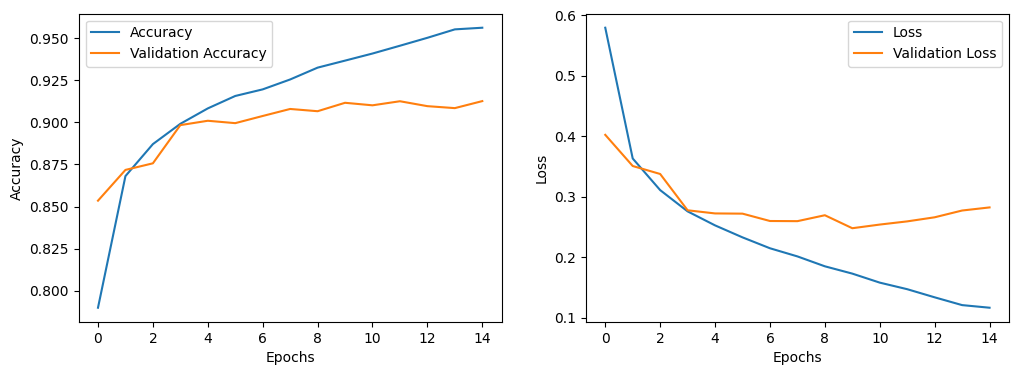

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=15, batch_size=64,
validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()